# Лабораторна робота №4  
## OpenCV. Просторові методи обробки зображень. Робота з околом. Просторова фільтрація зображення (short version)

**Студент:** Ярмішко Герман
**Група:** КІ-23-1
**Середовище:** Yarmishko_OpenCV

**Мета роботи:**  
знайомство з просторовими методами фільтрації зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.

## Завдання

### 1.Реалізувати фільтр на основі ядра Гауса

Гаусів фільтр є лінійним просторовим низькочастотним фільтром,
який використовується для згладжування зображень
та зменшення впливу шуму.

Фільтрація виконується шляхом згортки зображення
з гаусівським ядром, коефіцієнти якого визначаються
гаусівською функцією:

$[
G(x, y) = \frac{1}{2\pi\sigma^2}
\exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)
]$

де:
- $(x, y)$ — координати відносно центра ядра,
- $(\sigma)$ — параметр, що визначає ступінь згладжування.

Збільшення значення $(\sigma)$ або розміру ядра
призводить до більш інтенсивного згладжування зображення

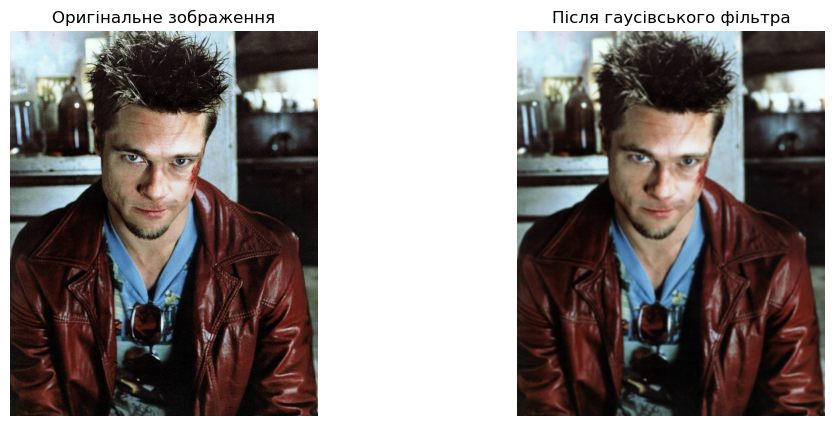

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("3F.jpg")

if img is None:
    print("Зображення не знайдено!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gaussian = cv2.GaussianBlur(img_rgb, (11, 11), 25)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Оригінальне зображення")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(gaussian)
    plt.title("Після гаусівського фільтра")
    plt.axis("off")

    plt.show()


### 2.Процедура додавання нормального (гаусового) шуму

In [2]:
import numpy as np

def add_gaussian_noise(image, mean=0, sigma=20):
    """
    Додавання нормального (гаусового) шуму до зображення
    mean  — середнє значення шуму
    sigma — стандартне відхилення
    """
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image.astype(np.float32) + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

### 3.Зашумлення власного портрету

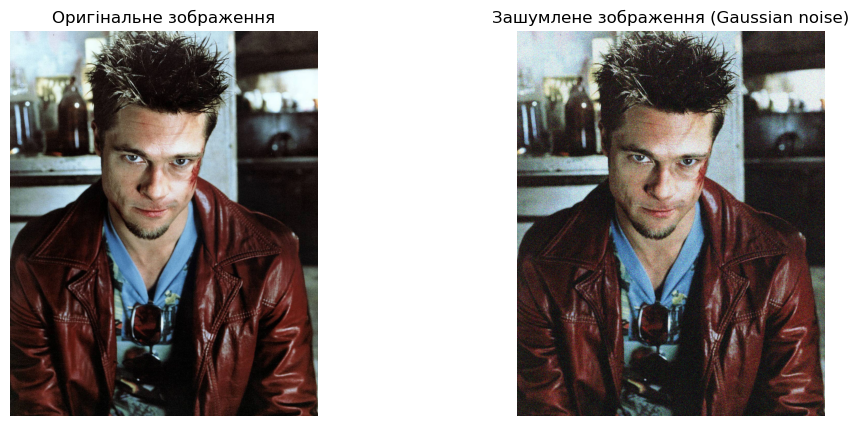

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("3F.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

noisy_img = add_gaussian_noise(img_rgb, mean=0, sigma=45)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Оригінальне зображення")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(noisy_img)
plt.title("Зашумлене зображення (Gaussian noise)")
plt.axis("off")

plt.show()

### 4.Медіанний + гаусів фільтри (послідовна обробка)

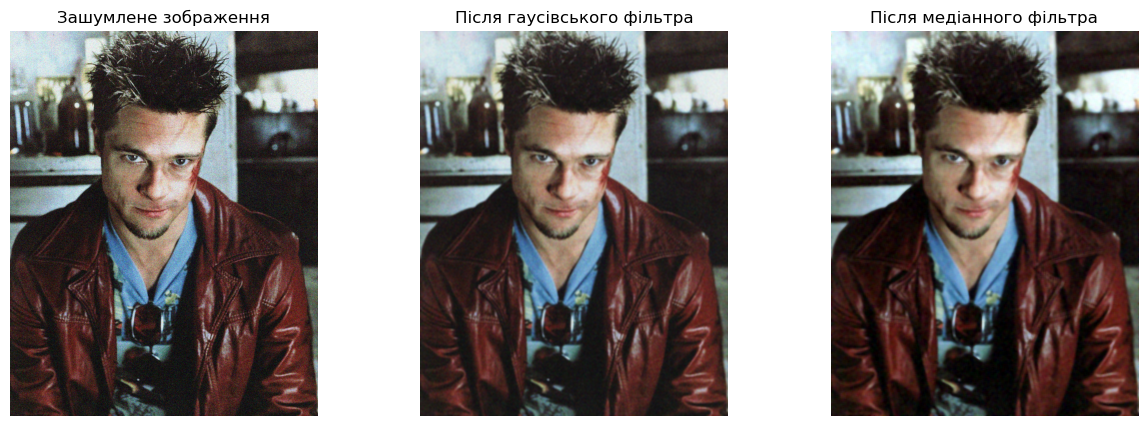

In [4]:
# Гаусів фільтр
gaussian_filtered = cv2.GaussianBlur(noisy_img, (11, 11), sigmaX=25)

# Медіанний фільтр
median_filtered = cv2.medianBlur(noisy_img, 15)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_img)
plt.title("Зашумлене зображення")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gaussian_filtered)
plt.title("Після гаусівського фільтра")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(median_filtered)
plt.title("Після медіанного фільтра")
plt.axis("off")

plt.show()

Гаусів фільтр ефективно пригнічує нормальний шум,
але частково розмиває границі об’єктів.
Медіанний фільтр краще зберігає краї та є ефективнішим
для усунення імпульсних складових шуму.

### 5.Двосторонній фільтр

Двосторонній фільтр є нелінійним низькочастотним фільтром,
який виконує згладжування зображення з одночасним
збереженням країв.

Фільтрація виконується з урахуванням:
- просторової близькості пікселів;
- різниці їх яскравостей.

Загальний вигляд двосторонньої фільтрації:

$[
g(x,y) =
\frac{1}{W_p}
\sum_{q \in \Omega}
f(q)\,
G_s(\|p-q\|)\,
G_r(|f(p)-f(q)|)
]$

де:
- $(G_s)$ — просторова гаусівська функція,
- $(G_r)$ — гаусівська функція за яскравістю,
- $(W_p)$ — нормувальний коефіцієнт.

Такий підхід дозволяє згладжувати однорідні області,
не розмиваючи границі об’єктів.


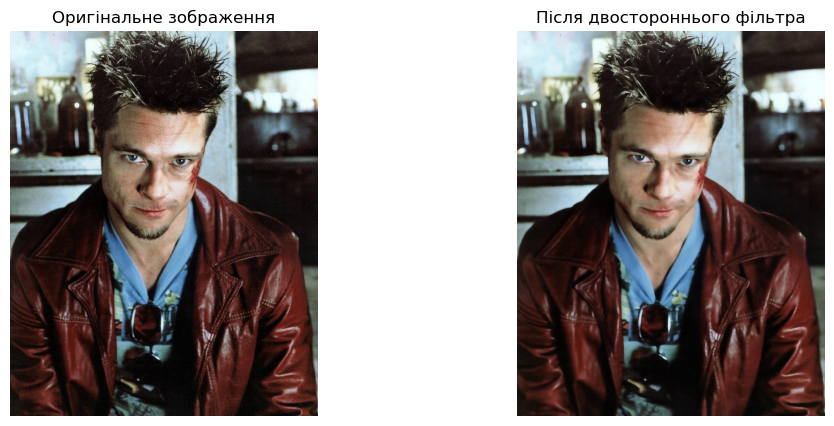

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("3F.jpg")

if img is None:
    print("Зображення не знайдено!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Двосторонній фільтр
    bilateral = cv2.bilateralFilter(
        img_rgb,
        d=15,
        sigmaColor=75,
        sigmaSpace=75
    )

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Оригінальне зображення")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(bilateral)
    plt.title("Після двостороннього фільтра")
    plt.axis("off")

    plt.show()


### 6.Єдина процедура з усіма низькочастотними фільтрами

In [6]:
def apply_lowpass_filter(image, filter_type):
    """
    Універсальна процедура для низькочастотних фільтрів
    filter_type: 'gaussian', 'median', 'bilateral'
    """
    if filter_type == "gaussian":
        return cv2.GaussianBlur(image, (11, 11), sigmaX=45)

    elif filter_type == "median":
        return cv2.medianBlur(image, 25)

    elif filter_type == "bilateral":
        return cv2.bilateralFilter(image, 15, 75, 75)

    else:
        raise ValueError("Невідомий тип фільтра")

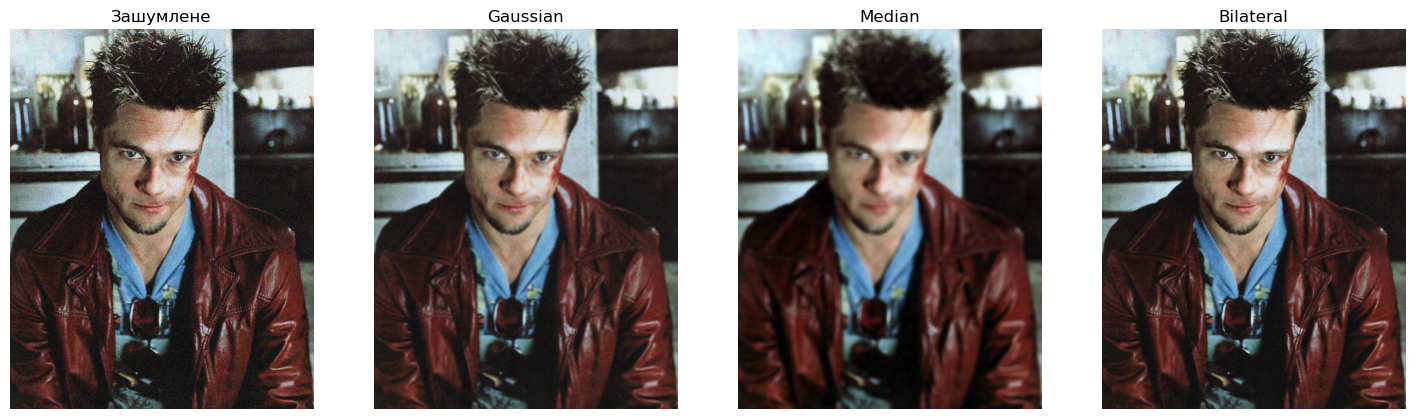

In [7]:
filtered_gauss = apply_lowpass_filter(noisy_img, "gaussian")
filtered_median = apply_lowpass_filter(noisy_img, "median")
filtered_bilateral = apply_lowpass_filter(noisy_img, "bilateral")

plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
plt.imshow(noisy_img)
plt.title("Зашумлене")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(filtered_gauss)
plt.title("Gaussian")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(filtered_median)
plt.title("Median")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(filtered_bilateral)
plt.title("Bilateral")
plt.axis("off")

plt.show()

## Висновок

У ході виконання лабораторної роботи були досліджені
основні просторові низькочастотні фільтри обробки зображень.
На основі власного портрету було реалізовано гаусівський,
медіанний та двосторонній фільтри, а також виконано
додавання нормального шуму до зображення.

Проведене порівняння показало, що гаусівський фільтр
ефективно пригнічує нормальний шум, медіанний фільтр
краще зберігає краї, а двосторонній фільтр дозволяє
згладжувати зображення із мінімальними втратами деталей.

## Контрольні запитання

### 1. У чому полягає сенс градаційних перетворень?
Сенс градаційних перетворень полягає у зміні значень
яскравості пікселів зображення без зміни їх просторового
розташування. Такі перетворення використовуються для
покращення контрасту та візуального сприйняття зображення.
### 2. На чому ґрунтуються гістограмні методи?
Гістограмні методи ґрунтуються на аналізі розподілу
яскравостей пікселів зображення за допомогою гістограми.
Інформація про цей розподіл використовується для
покращення контрасту, зокрема шляхом еквалізації гістограми.